# 0.) Import the US Perminent Visas using zip extractor

In [52]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [53]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [54]:
import zipfile

Exception ignored in: <function ZipFile.__del__ at 0x7f05f8618700>
Traceback (most recent call last):
  File "/usr/lib/python3.8/zipfile.py", line 1821, in __del__
  File "/usr/lib/python3.8/zipfile.py", line 1843, in close
  File "/usr/lib/python3.8/zipfile.py", line 1953, in _fpclose
OSError: [Errno 107] Transport endpoint is not connected
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)

In [96]:
zf = zipfile.ZipFile("/content/gdrive/MyDrive/ECON441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [69]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [70]:
# for i in df.columns:
#   # print(i)

In [71]:
df_select = df[["case_status", "class_of_admission","pw_level_9089","us_economic_sector"]]

In [93]:
df_select = df_select.dropna(axis=0,how='any')
df_select.head()

,case_status,class_of_admission,pw_level_9089,us_economic_sector
0,Certified,J-1,Level II,IT
1,Denied,B-2,Level I,Other Economic Sector
2,Certified,H-1B,Level I,Aerospace
3,Certified,B-2,Level II,Other Economic Sector
4,Certified,L-1,Level IV,Advanced Mfg


# 3.) Clean your data for a decision tree


In [101]:
X = pd.get_dummies(df_select, "class_of_admission","pw_level_9089","us_economic_sector")
y = df_select["case_status"]

In [83]:
# X.columns

# 4.) Fit and plot a decision tree of depth X


In [84]:
from sklearn import tree

In [102]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.6666666666666666, 0.875, 'pw_level_9089us_economic_sectorCertified <= 0.5\ngini = 0.599\nsamples = 374362\nvalue = [181933, 148586, 25649, 18194]\nclass = Certified'),
 Text(0.5, 0.625, 'pw_level_9089us_economic_sectorCertified-Expired <= 0.5\ngini = 0.377\nsamples = 192429\nvalue = [0, 148586, 25649, 18194]\nclass = Denied'),
 Text(0.3333333333333333, 0.375, 'pw_level_9089us_economic_sectorDenied <= 0.5\ngini = 0.486\nsamples = 43843\nvalue = [0, 0, 25649, 18194]\nclass = Certified'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 18194\nvalue = [0, 0, 0, 18194]\nclass = Certified'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 25649\nvalue = [0, 0, 25649, 0]\nclass = Certified'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 148586\nvalue = [0, 148586, 0, 0]\nclass = Denied'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 181933\nvalue = [181933, 0, 0, 0]\nclass = Certified')]

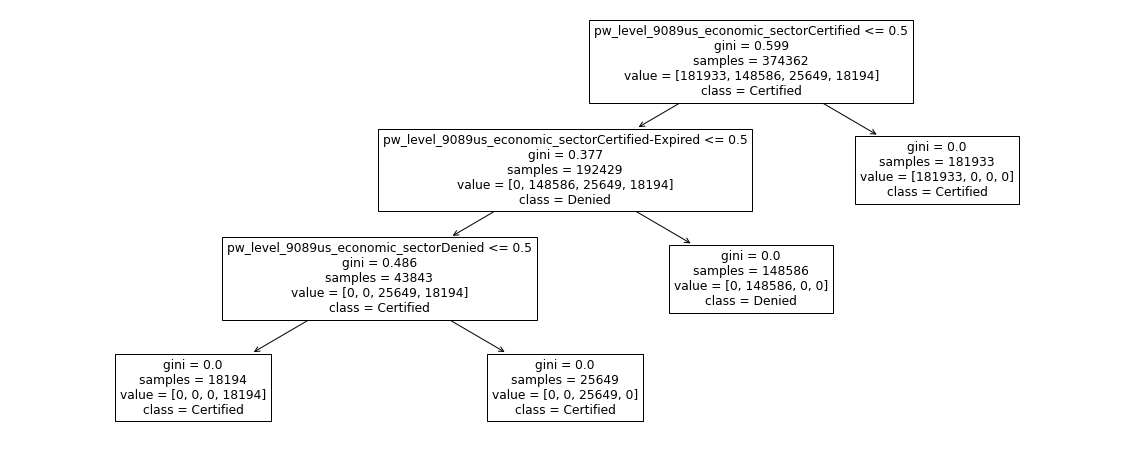

In [61]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf,feature_names = X.columns, class_names=y)

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest sameple size in leaf node is 181933, which means when class_of admission_pw_level less equal than 0.5, there are 181933 samples in this class. 
25694< PWlevel9089 < 181933 the class is certified, other wise they are not certified.

In [62]:
# If they are not certified ....


# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [63]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
max_depths=range(1,50)
outputs = []

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=0)

for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train,y_train)

  oos_accuracy=accuracy_score(y_test,clf.predict(X_test))
  outputs.append(oos_accuracy)

In [64]:
outputs

[0.8809534409530848,
 0.9505916711928697,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

highest accuracy is 3 depth
